In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Simulated customer data
np.random.seed(42)
data = {
    'Age': np.random.randint(20, 65, 100),
    'AnnualIncome': np.random.randint(20000, 120000, 100),
    'SpendingScore': np.random.randint(1, 100, 100)  # e.g., loyalty score or purchase frequency
}
df = pd.DataFrame(data)


In [3]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [4]:
# Use KMeans for clustering
k = 4  # Number of customer segments
model = KMeans(n_clusters=k, random_state=42)
df['Segment'] = model.fit_predict(X_scaled)


In [5]:
# Optional: Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_scaled)


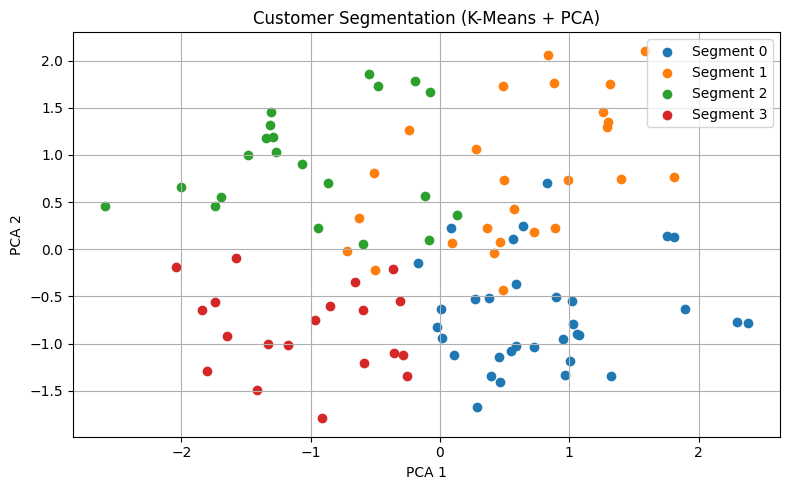

In [6]:
# Plot customer segments
plt.figure(figsize=(8, 5))
for cluster in range(k):
    plt.scatter(pca_features[df['Segment'] == cluster, 0], pca_features[df['Segment'] == cluster, 1], label=f'Segment {cluster}')
plt.title('Customer Segmentation (K-Means + PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()